<a href="https://colab.research.google.com/github/obdulia1/Aludenarticulo1/blob/master/PChilei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

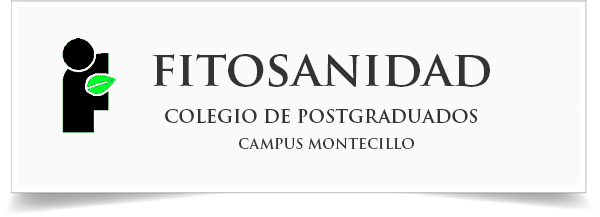

# Nueva sección

# Nueva sección

# EVOLUCION MOLECULAR  ENT-611-2025

## Autor: Obdulia Segura León
### Colegio de Postgradaudos

## 1.-Lectura de calidad de secuencias Fastqc
## 2.-Instalar programas

1. Calidad de secuencias
2. Limpieza de secuencias
3. Mapeo de secuencias a un genoma de referencia
4. Visualizacion de variantes

In [1]:
# INSTALAR BIOPYTHON
# INSTALAR ANACONDA
#! para intalar en google colab, en linux esto no se utiliza

! pip install biopython
! pip install -q condacolab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.5 MB/s eta 0:00:00


In [2]:
import condacolab
condacolab.install()


⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [2]:
# Instalación de los paquetes a utilizar
# bioconda, fastqc, fastp, trimmomatic, bwa, Bowtie2, samtools, bcftools, prokka
# -c de los canales mas recientes
! conda install -c bioconda fastqc fastp trimmomatic Bowtie2 bwa samtools bcftools prokka



Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



# 1.-ESTABLECER EL DIRECTORIO DE TRABAJO
## Cargar archivos
### Descargar archivo o subir desde el Drive
#!wget https://s3.amazonaws.com/public.ged.msu.edu/ecoli_ref-5m.fastq.gz
###Desde mi computadora
#from google.colab import files
#uploaded = files.upload()


### Desde google.colab import drive
drive.mount('/content/drive/MyDrive')
###
Cambio de directorio
import os
os.chdir('/content/drive/MyDrive/Data17_Pchile')


In [3]:
    from google.colab import drive

In [5]:
    drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Crear un directorio de trabajo si no lo tiene
!mkdir /content/drive/MyDrive/Pchile

In [9]:
!pwd

/content/drive/MyDrive/EcoliM


In [11]:
#cambiar el directorio de trabajo
import os
os.chdir('/content/drive/MyDrive/Data17_Pchile')

In [12]:
#corroborar que estamos dentro del directorio en donde estan los
os.getcwd()

'/content/drive/MyDrive/Data17_Pchile'

In [13]:
!ls


17EX01-06_S6_L001_R1_001.fastq.gz  17EX01-06_S6_L001_R2_001.fastq.gz


# 2.- LIMPIEZA DE SECUENCIAS
FastP

## lIMPIEZA DE SECUENCIAS o TRIMADO DE SECUENCIAS
http://www.usadellab.org/cms/?page=trimmomatic

Trimmomatic realiza una variedad de tareas de recorte tanto para datos de un solo extremo y de pares de Illumina. La selección de los pasos de recorte y sus parámetros asociados se proporcionan en la línea de comando.

Los pasos de recorte actuales son:

ILLUMINACLIP: Corta el adaptador y otras secuencias específicas de Illumina de la lectura.

SLIDINGWINDOW: Realiza un recorte de ventana corrediza, cortando una vez que la calidad promedio dentro de la ventana cae por debajo de un umbral.

LEADING: Cortar las bases al inicio de una lectura, si está por debajo de un umbral de calidad

TRAILING: Cortar las bases al final de una lectura, si está por debajo de un umbral de calidad

CROP: Cortar la lectura a una longitud específica

HEADCROP: Corta la cantidad especificada de bases desde el inicio de la lectura

MINLEN: Descartar la lectura si está por debajo de una longitud especificada

TOPHRED33: Convertir puntuaciones de calidad a Phred-33

TOPHRED64: Convertir puntuaciones de calidad a Phred-64

[Faxtp](https://github.com/OpenGene/fastp)

fastp -i R1 -o R1_trim -I R2 -O R2_trim -j -h

In [ ]:
#Fastp ayuda
!fastp --help

usage: fastp [options] ... 
options:
  -i, --in1                            read1 input file name (string [=])
  -o, --out1                           read1 output file name (string [=])
  -I, --in2                            read2 input file name (string [=])
  -O, --out2                           read2 output file name (string [=])
      --unpaired1                      for PE input, if read1 passed QC but read2 not, it will be written to unpaired1. Default is to discard it. (string [=])
      --unpaired2                      for PE input, if read2 passed QC but read1 not, it will be written to unpaired2. If --unpaired2 is same as --unpaired1 (default mode), both unpaired reads will be written to this same file. (string [=])
      --overlapped_out                 for each read pair, output the overlapped region if it has no any mismatched base. (string [=])
      --failed_out                     specify the file to store reads that cannot pass the filters. (string [=])
  -m, --merge  

In [ ]:
!pwd

/content/drive/MyDrive/EcoliM


In [ ]:
from os import mkdir
!mkdir ref

In [15]:
!mkdir trim_r

In [16]:
#fastp -i in.R1.fq.gz -I in.R2.fq.gz -o out.R1.fq.gz -O out.R2.fq.gz
# resultados en formatos J y h para HTML
!fastp -i 17EX01-06_S6_L001_R1_001.fastq.gz -I 17EX01-06_S6_L001_R2_001.fastq.gz -o trim_r/17EX01_R1.fastq.trim.gz -O trim_r/17EX01-R2.fastq.trim.gz trim_r/-j -h

Read1 before filtering:
total reads: 3232525
total bases: 243342371
Q20 bases: 234933952(96.5446%)
Q30 bases: 220102172(90.4496%)
Q40 bases: 0(0%)

Read2 before filtering:
total reads: 3232525
total bases: 243844605
Q20 bases: 213129187(87.4037%)
Q30 bases: 181507494(74.4357%)
Q40 bases: 0(0%)

Read1 after filtering:
total reads: 3134438
total bases: 235943044
Q20 bases: 228480178(96.837%)
Q30 bases: 214849167(91.0598%)
Q40 bases: 0(0%)

Read2 after filtering:
total reads: 3134438
total bases: 236407118
Q20 bases: 209312171(88.5389%)
Q30 bases: 179749036(76.0337%)
Q40 bases: 0(0%)

Filtering result:
reads passed filter: 6268876
reads failed due to low quality: 196086
reads failed due to too many N: 88
reads failed due to too short: 0
reads with adapter trimmed: 3594
bases trimmed due to adapters: 65297

Duplication rate: 20.3496%

Insert size peak (evaluated by paired-end reads): 112

JSON report: -h
HTML report: fastp.html

fastp -i 17EX01-06_S6_L001_R1_001.fastq.gz -I 17EX01-06_S6_L0

In [ ]:
!mv *trim.gz trim_r

In [17]:
!mv fastp.html trim_r/

In [18]:
!mv -h trim_r/

mv: invalid option -- 'h'
Try 'mv --help' for more information.


# 3.- OBTENER GENOMAS O TRANSCRIPTOMA DE REFERENCIA
1.-Desde NCBI genomas el formato ftp y copiar la liga de archivo **.fna.gz**\
2. Desde [GenARK](https://genome.ucsc.edu/cgi-bin/hgGateway)\
  A.- Realizar la busqueda de la especie\
  B.-copiar la direccion : **Assembly FTP location**

Clawson, H., Lee, B.T., Raney, B.J. et al. "GenArk: towards a million UCSC genome browsers.
Genome Biol 24, 217 (2023). https://doi.org/10.1186/s13059-023-03057-x


In [19]:
#Genoma de Referencia
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/605/725/GCF_022605725.1_icAntGran1.3/GCF_022605725.1_icAntGran1.3_rna.fna.gz

--2025-06-30 03:32:49--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/022/605/725/GCF_022605725.1_icAntGran1.3/GCF_022605725.1_icAntGran1.3_rna.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17160513 (16M) [application/x-gzip]
Saving to: ‘GCF_022605725.1_icAntGran1.3_rna.fna.gz’

GCF_022605725.1_icA 100%[===================>]  16.37M  28.7MB/s    in 0.6s    

2025-06-30 03:32:50 (28.7 MB/s) - ‘GCF_022605725.1_icAntGran1.3_rna.fna.gz’ saved [17160513/17160513]



In [21]:
!mkdir Ref

In [23]:
!mv GCF_022605725.1_icAntGran1.3_rna.fna.gz Ref/

In [24]:
!gunzip Ref/GCF_022605725.1_icAntGran1.3_rna.fna.gz

# 4.-ENSAMBLE DE UN GENOMA CON UN GENOMA DE REFERENCIA
Realizar el mapeo de las secuencias problema a un genoma de referencia
BOWTIE2 es un software para el mapeo de secuencias a un genoma de referencia
https://rnnh.github.io/bioinfo-notebook/docs/bowtie2.html
### [BOWTIE2](https://bowtie-bio.sourceforge.net/bowtie2/index.shtml)
1.-Bowtie2 crear un índice del genoma de referencia a partir del formato fasta.

    $ bowtie2-build input_reference.fasta index_prefix\
2.-Realizar el mapeo

    $ bowtie2 -x index/Ecoli_ind -1 SRR030257_1.fastq.gz 2 SRR030257_2.fastq.gz -S mapped/Ecoli.sam
opciones de salida\
--no-unal las lecturas que no sean alineadas al genoma de referencia no se escriban en el archivo de salida **sam** \

-un write unpaired reads that didn't align to <path> \
-un unaligned.gz\
-p is el numero (n) de processors/threads used\
-x is el genome index\
-1 is el file(s) R1_trim_reads\
-2 is el file(s) R2_trim_reads\
-S is el alineamiento de salida en formato sam\
más opciones en bowtie2 -help\
o\
[github Bowtie2](https://github.com/BenLangmead/bowtie2)

## Otros MAPEADORES
[BWA](https://bio-bwa.sourceforge.net/bwa.shtml)

El algoritmo de *bwa mem* es uno de los tres algoritmos que tiene BWA. Este realiza alineamintos locales y resulta en alineamientos en diferentes partes de la secuencia de busqueda.\
[segemehl](http://legacy.bioinf.uni-leipzig.de/Software/segemehl/#installation)
Es un software para alinear lecturas cortas a un genoma, transcriptoma de referencia en donde se implementa la estrategia de enhanced suffix arrays (ESA)

### 1. Generar un indice de referencia del genoma

In [25]:
!mkdir index

In [ ]:
!bowtie2 -help

In [ ]:
#descoprimir archivo
#o bajar desde NCBI-Nucleotide en Formato fasta
!gunzip ref/Ecoli_genomic.fna.gz

In [29]:
#el archivo de genoma de referencia debe de estar en formato *fasta
#se generan archivos *.bt2
!bowtie2-build Ref/GCF_022605725.1_icAntGran1.3_rna.fna index/AntG_ind


Settings:
  Output files: "index/AntG_ind.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  Ref/GCF_022605725.1_icAntGran1.3_rna.fna
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:01
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:01
bmax according to bmaxDivN setting: 23513175
Using parameters --bmax 17634882 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 17634882 --dc

In [31]:
!mkdir mapped

In [38]:
!mkdir unmapped

In [39]:
# mapeo de las lecturas limpias al genoma de referencia con Bowtie2
!bowtie2 -x index/AntG_ind -1 trim_r/17EX01_R1.fastq.trim.gz -2 trim_r/17EX01-R2.fastq.trim.gz -S mapped/Pchile.sam

3134438 reads; of these:
  3134438 (100.00%) were paired; of these:
    3110962 (99.25%) aligned concordantly 0 times
    5619 (0.18%) aligned concordantly exactly 1 time
    17857 (0.57%) aligned concordantly >1 times
    ----
    3110962 pairs aligned concordantly 0 times; of these:
      72 (0.00%) aligned discordantly 1 time
    ----
    3110890 pairs aligned 0 times concordantly or discordantly; of these:
      6221780 mates make up the pairs; of these:
        6197309 (99.61%) aligned 0 times
        10952 (0.18%) aligned exactly 1 time
        13519 (0.22%) aligned >1 times
1.14% overall alignment rate


In [ ]:

!mkdir unmapped


In [41]:
# obtener las secuencias que No se alinearon al genoma de referencia
#bowtie2 -x tu_indice -U lecturas.fastq -S salida.sam -un lecturas_no_alineadas.fastq -al lecturas_alineadas.fastq
!bowtie2 -x index/AntG_ind -1 trim_r/17EX01_R1.fastq.trim.gz -2 trim_r/17EX01-R2.fastq.trim.gz -S mapped/Pchile1.sam --un-conc unmapped/Pchile.unaligned.fastq.gz

3134438 reads; of these:
  3134438 (100.00%) were paired; of these:
    3110962 (99.25%) aligned concordantly 0 times
    5619 (0.18%) aligned concordantly exactly 1 time
    17857 (0.57%) aligned concordantly >1 times
    ----
    3110962 pairs aligned concordantly 0 times; of these:
      72 (0.00%) aligned discordantly 1 time
    ----
    3110890 pairs aligned 0 times concordantly or discordantly; of these:
      6221780 mates make up the pairs; of these:
        6197309 (99.61%) aligned 0 times
        10952 (0.18%) aligned exactly 1 time
        13519 (0.22%) aligned >1 times
1.14% overall alignment rate


In [33]:
!bowtie2 -h

Bowtie 2 version 2.5.4 by Ben Langmead (langmea@cs.jhu.edu, www.cs.jhu.edu/~langmea)
Usage: 
  bowtie2 [options]* -x <bt2-idx> {-1 <m1> -2 <m2> | -U <r> | --interleaved <i> | -b <bam>} [-S <sam>]

  <bt2-idx>  Index filename prefix (minus trailing .X.bt2).
             NOTE: Bowtie 1 and Bowtie 2 indexes are not compatible.
  <m1>       Files with #1 mates, paired with files in <m2>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <m2>       Files with #2 mates, paired with files in <m1>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <r>        Files with unpaired reads.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <i>        Files with interleaved paired-end FASTQ/FASTA reads
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <bam>      Files are unaligned BAM sorted by read name.
  <sam>      File for SAM output (default: stdout)

  <m1>, <m2>, <r> can be 

HASTA AQUI CORRIO TODO BIEN

# Ensamble con Metasspades

In [42]:
!pip3 install --upgrade pybiolib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.0 MB/s eta 0:00:00


In [61]:
!conda install bioconda::spades

Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconda::spades


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    spades-4.2.0               |       h8d6e82b_1        32.6 MB  bioconda
    ------------------------------------------------------------
                                           Total:        32.6 MB

The following NEW packages will be INSTALLED:

  spades             bioconda/linux-64::spades-4.2.0-h8d6e82b_1 



                                                                        
Preparing transaction: - done
Verifying transaction: | done
Ex

In [44]:
!mkdir metaspades_assembly

In [48]:
#cambiar el directorio de trabajo
import os
os.chdir('/content/drive/MyDrive/Data17_Pchile/metaspades_assembly')

In [49]:
!pwd

/content/drive/MyDrive/Data17_Pchile/metaspades_assembly


In [50]:
!mkdir output_dir

In [63]:
# como nos cambiamos de directorio vamos a definir la ruta de los archivos a utilizar
R1_unaligned = "/content/drive/MyDrive/Data17_Pchile/unmapped/Pchile.unaligned.fastq.1.gz"
R2_unaligned = "/content/drive/MyDrive/Data17_Pchile/unmapped/Pchile.unaligned.fastq.2.gz"

In [66]:
 #Como la secuencias son de RNAseq se utiliza spades.py --rna
 #spades.py --meta [options] -o <output_dir>
metaspades_command = f"spades.py --meta -1 {R1_unaligned} -2 {R2_unaligned} -o output_dir"
#Ejecuta el comando
!{metaspades_command}

Running metaSPAdes command: spades.py --meta --pe12 /content/drive/MyDrive/Data17_Pchile/unmapped/Pchile.unaligned.fastq.gz -o output_dir
SPAdes genome assembler v4.2.0 [metaSPAdes mode]

Usage: spades.py [options] -o <output_dir>
spades.py: error: Please specify option (e.g. -1, -2, -s, etc)) for the following paths: --pe12, /content/drive/MyDrive/Data17_Pchile/unmapped/Pchile.unaligned.fastq.gz


In [54]:
metaspades_command = f"spades.py --meta -1 {R1_unaligned} -2 {R2_unaligned} -o output_dir"
print(f"Running metaSPAdes command: {metaspades_command}")
 #Ejecuta el comando
! {metaspades_command}

Running metaSPAdes command: spades.py --meta -1 /content/drive/MyDrive/Data17_Pchile/unmapped/Pchile.unaligned.fastq.1.gz -2 /content/drive/MyDrive/Data17_Pchile/unmapped/Pchile.unaligned.fastq.2.gz -o output_dir
/bin/bash: line 1: spades.py: command not found


In [68]:
spades_command = f"spades.py --meta  -1 /content/drive/MyDrive/Data17_Pchile/unmapped/Pchile.unaligned.fastq.1.gz  -2 /content/drive/MyDrive/Data17_Pchile/17EX01-06_S6_L001_R2_001.fastq.gz -o output_dir"